In [ ]:
!pip install tensorflow
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install opencv-python
!pip install plotly

In [ ]:
!pip install flask

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from google.colab import files

# Set paths
dataset_path = "/content/drive/MyDrive/brain_tumor_dataset/"
categories = ["no", "yes"]

# Load dataset
data, labels = [], []

for category in categories:
    folder = os.path.join(dataset_path, category)
    label = categories.index(category)  # 0 for No Tumor, 1 for Tumor

    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (128, 128))
        data.append(image)
        labels.append(label)



In [ ]:
# Convert to NumPy arrays
X = np.array(data).reshape(-1, 128, 128, 1) / 255.0  # Normalize
y = np.array(labels)

# Split dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Dataset Loaded: {X_train.shape}, {X_val.shape}")

Dataset Loaded: (202, 128, 128, 1), (51, 128, 128, 1)


In [ ]:
# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

# Save model
model.save("/content/drive/MyDrive/mri_tumor_model.h5")
print("Model saved to Google Drive!")

# Save training history
history_path = "/content/drive/MyDrive/history.pkl"
with open(history_path, "wb") as f:
    pickle.dump(history.history, f)
print("Training history saved!")

# Load training history
with open(history_path, "rb") as f:
    history = pickle.load(f)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 945ms/step - accuracy: 0.5042 - loss: 0.6935 - val_accuracy: 0.6863 - val_loss: 0.6086
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7207 - loss: 0.5432 - val_accuracy: 0.7451 - val_loss: 0.5334
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 862ms/step - accuracy: 0.7870 - loss: 0.5213 - val_accuracy: 0.6667 - val_loss: 0.6225
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 910ms/step - accuracy: 0.7293 - loss: 0.5645 - val_accuracy: 0.7647 - val_loss: 0.5147
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8134 - loss: 0.4371 - val_accuracy: 0.8039 - val_loss: 0.4892
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8341 - loss: 0.4016 - val_accuracy: 0.8039 - val_loss: 0.4757
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8671 - loss: 0.3811 - val_accuracy: 0.8627 - val_loss: 0.4140
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8235 - loss: 0.4093 - val_accuracy: 0.8431 - val_loss: 0.3862
Epo

Model saved to Google Drive!
Training history saved!


In [ ]:
# Create accuracy and loss plots
fig_acc = go.Figure()
fig_acc.add_trace(go.Scatter(y=history["accuracy"], mode='lines+markers', name='Train Accuracy'))
fig_acc.add_trace(go.Scatter(y=history["val_accuracy"], mode='lines+markers', name='Validation Accuracy'))
fig_acc.update_layout(title="Model Accuracy", xaxis_title="Epochs", yaxis_title="Accuracy")

fig_loss = go.Figure()
fig_loss.add_trace(go.Scatter(y=history["loss"], mode='lines+markers', name='Train Loss'))
fig_loss.add_trace(go.Scatter(y=history["val_loss"], mode='lines+markers', name='Validation Loss'))
fig_loss.update_layout(title="Model Loss", xaxis_title="Epochs", yaxis_title="Loss")

# Save plots
fig_acc.write_html("/content/drive/MyDrive/accuracy_plot.html")
fig_loss.write_html("/content/drive/MyDrive/loss_plot.html")

print("Accuracy and Loss plots saved! Open them from Google Drive.")

Accuracy and Loss plots saved! Open them from Google Drive.


In [ ]:
# Function to upload and classify an MRI image
def classify_mri_image(model_path):
    model = load_model(model_path)

    print("Upload an MRI image to check for tumor presence:")
    uploaded = files.upload()
    for filename in uploaded.keys():
        img_path = filename
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (128, 128))
        image = np.array(image).reshape(-1, 128, 128, 1) / 255.0  # Normalize

        prediction = model.predict(image)
        result = "Tumor Detected" if prediction[0][0] > 0.5 else "No Tumor Detected"

        print(f"Prediction: {result}")
        plt.imshow(cv2.imread(img_path), cmap="gray")
        plt.title(result)
        plt.show()


Upload an MRI image to check for tumor presence:


Saving image(17).jpg to image(17).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
Prediction: Tumor Detected


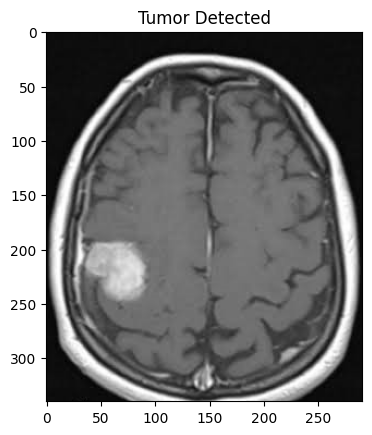

In [ ]:
# Run image classification
classify_mri_image("/content/drive/MyDrive/mri_tumor_model.h5")